<a href="https://colab.research.google.com/github/pathilink/capim_case/blob/main/notebook/capim_case_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#BEE41D'>Capim - Data Analyst Case [EDA] </font>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/test/capim/data/data_model_capim.csv')
df.sample(5)

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,TRIAL_START_HOUR,TRIAL_START_HOUR_CATEGORY,TRIAL_START_DAY_OF_WEEK,TRIAL_START_DAY_OF_WEEK_CATEGORY,HAS_USER_CREATED,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CHANNEL_GROUP,MARKETING_ATTRIBUITION_CAMPAIGN,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,MARKETING_ATTRIBUITION_AD_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT,REASON_1,REASON_2,REASON_3,REASON_4,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
11070,10878,2023-09-19 20:56:52.090,Independente,False,Inbound,['bnpl'],Apenas BNPL,True,True,False,7,2023-09-19,2023-09-20,20,After Hours,2,Weekday,True,Paid - meta,Paid - meta,meta_signup_bnpl_Antiga,SaaS,NaN,True,True,False,True,False,Concluído,2023-09-19 21:50:58.510,2023-09-19 21:50:58.511,2023-09-20 17:12:35.141,NaN,bnpl,NaN,NaN,NaN,sub_1NsbJ1CpjOdJI4gT5cb3Otkn,2023-09-20,NaN,2023-09-20 22:03:47,2024-09-20 22:03:47,2023-09-20 22:03:47,2023-09-20 22:03:49.000,complete,active,12.0,Cartão de Crédito,visa,587.16,ANUAL30,YqXjKdhe,2023-09-20 17:38:41.518,procedure_created,medical_record,patient,patient,False,False,True,False,True,False
1714,9363,2023-08-08 18:35:04.103,Independente,False,Inbound,['bnpl'],Apenas BNPL,True,True,False,11,2023-08-08,2023-08-19,18,Business Hours,2,Weekday,True,Other,Other,NaN,NaN,NaN,False,True,False,True,False,Concluído,2023-08-08 18:53:30.925,2023-08-08 18:53:30.925,2023-08-09 17:59:06.710,NaN,bnpl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-17 15:15:22.976,pre_analysis,bnpl,finance,bnpl,False,True,False,False,False,True
7516,10288,2023-09-04 14:32:44.355,Independente,False,Inbound,"['finance_management', 'calendar', 'bnpl', 'pa...",BNPL e SaaS,True,False,True,7,2023-09-04,2023-09-05,14,Business Hours,1,Weekday,True,Site - pediu ajuda,Other - known,NaN,NaN,NaN,False,True,False,True,False,Concluído,2023-09-15 10:18:50.246,2023-09-15 10:18:50.258,2023-09-15 11:49:07.129,NaN,finance_management,calendar,bnpl,patients_management,sub_1NmymqCpjOdJI4gTBT9vExpN,2023-09-05,NaN,2023-10-05 09:55:20,2023-11-05 09:55:20,2023-10-05 09:57:08,2023-10-05 12:12:30.000,complete,active,1.0,Cartão de Crédito,mastercard,89.90,NaN,NaN,2023-09-05 15:01:04.705,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2254,9539,2023-08-13 22:00:07.611,Independente,False,Inbound,"['calendar', 'bnpl', 'patients_management', 'f...",BNPL e SaaS,False,False,True,7,2023-08-13,2023-08-20,22,After Hours,7,Weekend,True,Paid - google,Paid - google,google_search_branding_signup,Branding,NaN,True,True,False,True,False,Concluído,2023-08-18 11:40:08.168,2023-08-18 11:40:08.169,2023-08-18 12:52:32.554,NaN,calendar,bnpl,patients_management,finance_management,sub_1NhxnjCpjOdJI4gT1aj9u3Mp,2023-08-22,NaN,2023-09-22 13:51:31,2023-10-22 13:51:31,2023-09-22 14:01:15,2023-09-22 15:23:20.000,complete,active,1.0,Cartão de Crédito,mastercard,89.90,NaN,NaN,2023-08-18 15:22:23.524,budget_created,budget_management,patient,patient,False,False,True,False,True,False
324,9051,2023-08-01 21:34:24.283,Independente,False,Inbound,"['patients_management', 'c

## Metrics

### Trial

In [4]:
df['TRIAL_DURATION'].describe()

,TRIAL_DURATION
count,13516.000000
mean,9.464782
std,24.050933
min,0.000000
25%,7.000000
50%,7.000000
75%,7.000000
max,365.000000


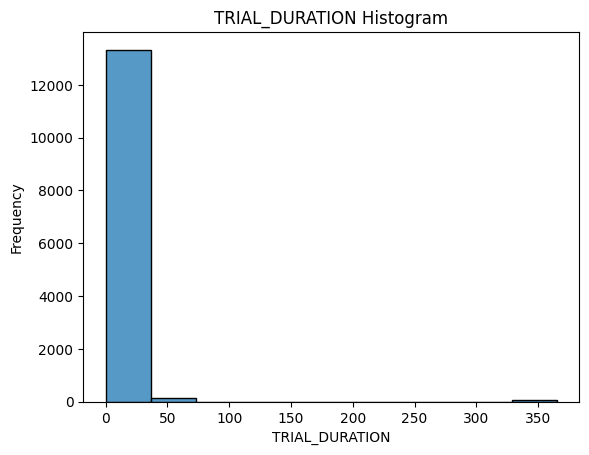

In [5]:
sns.histplot(df['TRIAL_DURATION'], bins=10, kde=False)

# Exibindo o gráfico
plt.title('TRIAL_DURATION Histogram')
plt.xlabel('TRIAL_DURATION')
plt.ylabel('Frequency')
plt.show()


In [6]:
# drop trial above 7

df = df[df['TRIAL_DURATION'] <= 7]

In [7]:
# average
avg_trial_duration = df['TRIAL_DURATION'].mean()
print(f'Average trial duration: {avg_trial_duration:.2f} days.')


Average trial duration: 6.97 days.


### Subscription

In [8]:
total_clinics = df['CLINIC_ID'].nunique()
clinics_with_subscription = df[df['SUBSCRIPTION_STATUS'] == 'active'].groupby('CLINIC_ID').nunique().count().iloc[0]
conversion_rate = (clinics_with_subscription / total_clinics) * 100
print(f'Subscription conversion rate: {conversion_rate:.2f}%')


Subscription conversion rate: 15.30%


### Cancelation

## Accreditation

In [9]:
df.columns

Index(['CLINIC_ID', 'CLINIC_CREATED_AT', 'BUSINESS_SEGMENTATION',
       'IS_CHAIN_CLINIC', 'FIRST_USER_HUBSPOT_SOURCE', 'INTEREST_REASONS',
       'INTEREST_CATEGORY_SIGNUP', 'HAS_INTEREST_BNPL',
       'HAS_INTEREST_BNPL_ONLY', 'HAS_INTEREST_SAAS', 'TRIAL_DURATION',
       'TRIAL_START_DATE', 'TRIAL_END_DATE', 'TRIAL_START_HOUR',
       'TRIAL_START_HOUR_CATEGORY', 'TRIAL_START_DAY_OF_WEEK',
       'TRIAL_START_DAY_OF_WEEK_CATEGORY', 'HAS_USER_CREATED',
       'MARKETING_ATTRIBUITION', 'MARKETING_ATTRIBUITION_CHANNEL_GROUP',
       'MARKETING_ATTRIBUITION_CAMPAIGN',
       'MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT',
       'MARKETING_ATTRIBUITION_AD_GROUP', 'IS_PAID_MEDIUM',
       'HAS_ASKED_FOR_ACCREDITATION',
       'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED',
       'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED',
       'CLINIC_ACCREDITATION_STATUS', 'REQUEST_FINISHED_AT',
       'ACCREDITATION_REQUESTED_AT', 'ACCREDITATION_APPROVED_AT',
       'ACCREDITATION_REJECTED_A